## Henon map

When we talk about nonlinear signal analysis, we intend to describe any signal as a time-series generated by a chaotic dynamics or nonlinear dynamics (NLD). NLD is a generic term to describe any conservative system by a set of differential equations, whose time-course from time t0 to time t1 can be explored in a phase-space. The latter represents the set of all possible value the variables of the system can assume and it is described by a trajectory or curve in $(q,p)$ or $(x_1,x_2)$ cartesian space. $(q,p)$ are normally consider position or momentum variables and $(x_1,x_2)$ are state variables. In general, they are highdimensional. The most interesting behavior of a system is the variable dynamics at regime or $t \rightarrow \inf$. In particular, if the system reaches a subset of the potential phase-space and remains inside that subset, we speak about an attractor. It is possible that this subset is either a point or any other geometrical shape that can be described by integer dimension (such as a line). However, it is possible that they might have irregular or fractal shape and we then speak about strange attractors. The fractal can be always consider a geometry between a point or a line or a line and a surface. The geometrical dimension that one obtain via the box counting method is general not integer for a fractal (see Cantor set). The main message is that one may characterize a strange attractor by the fractal dimensiom or any method that can estimate it. 

However, it is important to remind two aspects to avoid confusion. We assume that a strange attractor is always chaotic, but it is not always the case. Most of them are, but the the correct approach should consider the estimation of the fractal dimension and the lyapunov exponents to speak about a chaotic strange attractor. The second aspect is that we do not know the dynamical system in most of signal analysis problems. We need to estimate the phase space. Takens theorem, sample entropy

## Import packages

In [130]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds
from IPython.display import Image
WD_PATH = os.path.dirname(os.getcwd())
print(WD_PATH)
separator    = ''
cantor_path = separator.join([WD_PATH,'/images/cantor_set.png'])
# Image(cantor_path)
print(cantor_path)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/images/cantor_set.png


## Cantor Set and Box Counting

The fractal dimension is normally given by the box counting method as:

$$D = \lim_{\epsilon \rightarrow 0} \frac{\log{N(\epsilon)}}{\log{1/\epsilon}}$$,

where $N(\epsilon)$ is the number of n-dimensionsals cubes of size (edge length) $\epsilon$. In general, we can say that:

1. $D = 0$ for a point, since $N(\epsilon) = 1$ and $\epsilon = 1$
2. $D = 1$ for a line, since $N(\epsilon) = l/\epsilon$
3. $D = \log(2)/\log(3)$ for a cantor set (see below), since $N(\epsilon) = 2^n$ and $\epsilon = 3^{-n}$

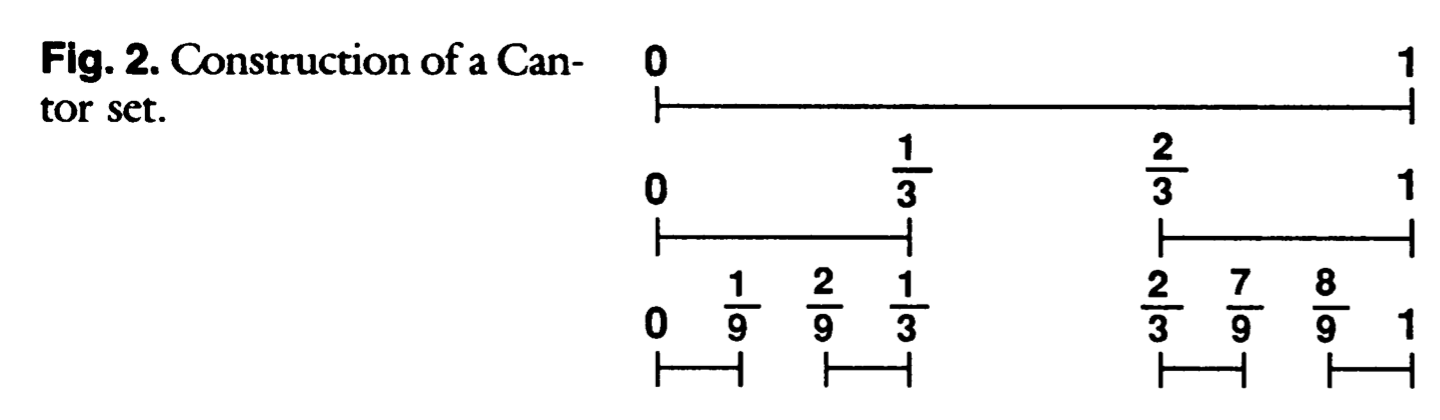

In [132]:
Image(cantor_path)

## Henon Map: ODEs and phase-space

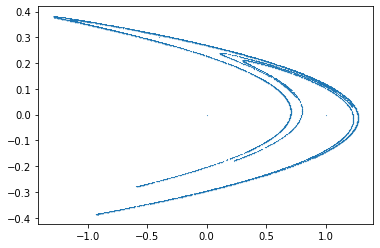

In [107]:
#python3
# import numpy as np 
# import matplotlib.pyplot as plt 
# plt.style.use('dark_background')

def henon_attractor(x, y, a=1.4, b=0.3):
    '''Computes the next step in the Henon 
    map for arguments x, y with kwargs a and
    b as constants.
    '''
    x_next = 1 - a * x ** 2 + y
    y_next = b * x
    return x_next, y_next
    
# number of iterations and array initialization
steps = 10000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0, 0

# add points to array
for i in range(steps):
    x_next, y_next = henon_attractor(X[i], Y[i])
    X[i+1] = x_next 
    Y[i+1] = y_next

# plot figure
plt.plot(X, Y, '^', alpha = 0.8, markersize=0.3)
# plt.axis('off')
plt.show()
plt.close()

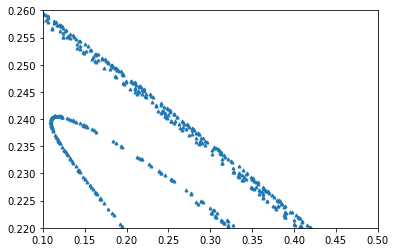

In [147]:
plt.plot(X, Y, '^', markersize=3)
plt.xlim([0.1,0.5])
plt.ylim([0.22,0.26])
# plt.axis('off')
plt.show()
plt.close()

## Correlation dimension 

The Henon map is a strange attractor as can be seen in the figure above. First, the dynamics of the system converges to a limited area in the phase space. On top of that, if we enlarge any zone of this limited region, we notice that trajectory follows a cantor set, which is fractal by definition. Therefore, the frontier of the Henon region contains a fractal stucture, which somehow enriches or make the border line more complex. Eventually, this trajectory should be something between a line and a surface and should have a dimension that is not an integer. 

Given the time-structure of the Henon map (and biological signals more in general), we rely on the correlation dimension, which can approximate the more appropriate box counting. The correlation integral is defined as:

$$ C(r) = \lim_{N \rightarrow \inf} \frac{1}{N} \sum_{ij}^{N} \theta(r-|\textbf{X}_i -\textbf{X}_j|) $$

where $\textbf{X}_i$ is the vector form of N-points of a long time-series of an attractor, $\theta$ is the heaviside function and $r$ is a tolerance parameter that defines the volume boundary for the match via $\theta$. In general, $C{r}$ follows a power-law:

$C(r) \approx r^\nu $

where $\nu$ is closer to the fractal dimension $D$ for the right embedded dimension. Therefore, one can estimate D by $C(r)$ by sweeping $r$ in a large enough range and compute $\nu$ as:

$$ \nu \approx \frac{\log{C(r)}}{\log{r}} $$

The slope $\nu$ is expected to be 1.21 according to Procaccia et al. 1983, while $D$ is 1.26.

In [108]:
sd_x= np.std(X, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 1.0* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(X,emb_dim=2, rvals=rvals_vect, debug_data=True)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


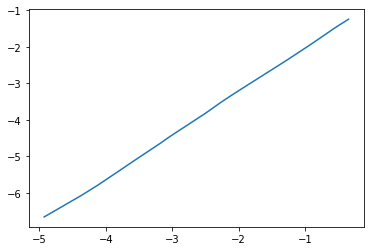

In [109]:
plt.plot(set_cr[0],set_cr[1])

In [110]:
print(dim_corr)

1.19584226632868


## Lyapunov Exponents

Any chaotic attractor is sensitive to the initial conditions, which means that the two trajectories start very close to each other will rapidly diverge. 

(Figure)

It can be demonstrated that after a transient has elapsed and a trajectory has settled on, the norm of the separation vector is $\delta(t)$ is:

$$\delta(t)=\delta_0\exp(\lambda*t)$$

The parameter $\lambda$ is the lyapunov exponent and expresses the exponential divergence of the attractor. In general, there are n lyapunov exponents, as many as the n-dimension of the attractor.

Therefore, the henon map should have two lyapunov exponents as a two dimensional chaotic attractor. The fact that it is chaotic can be also assessed by the fact the lyapunov exponents change sign: a stable system have all the exponents below zero, an unstable have all the exponents above zero and a chaotic have only the first set above zero.

In [124]:
nolds.lyap_r(X, emb_dim=2)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.35920755518110165

In [125]:
nolds.lyap_e(X, emb_dim=2, matrix_dim=2)

array([ 0.41650108, -1.5656688 ], dtype=float32)

## Sample Entropy

Estimation of entropy follows the concept of the correlation dimension.

In [113]:
sd_x       = np.std(X, ddof=1)
nolds.sampen(X, emb_dim=2, tolerance= 0.2*sd_x)

0.456471361870345

## Hurst exponent

Estimation of the Hurst Exponent via Fathon

In [114]:
nMin = 16
nMax = 2**12
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [115]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [116]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [117]:
H,n_w,F_w = test_mat_dfa_lorenz(X)
print(H)

0.364262019468769


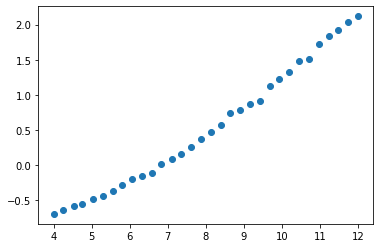

In [118]:
plt.scatter(np.log2(n_w), np.log2(F_w))

Formula according with https://journals.aps.org/pre/abstract/10.1103/PhysRevE.53.5445. However, Hurst exponent is defined 

In [119]:
Hurst_corrdim = 1-dim_corr/2
print(Hurst_corrdim)

0.40207886683565996


Estimation of Hurst via nolds

In [120]:
h = nolds.dfa(X)
print(h)

0.3226705651317883


/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)
